IMPORT STATEMENTS

In [12]:
import pandas as pd
import tweepy
import networkx as nx
import time
import matplotlib.pyplot as plt
import pickle
import pyvis
from pyvis.network import Network
import math


DATA LOADING

In [2]:
# get user name list
file_path = '../user_tweets/user_details.csv'
df = pd.read_csv(file_path)
df.head()

,username,id,displayname,followersCount,friendsCount,location
0,BJP4JnK,1864685238,BJP Jammu & Kashmir,86433,222,Jammu & Kashmir
1,GulabMatiala,2922933098,Gulab Singh,38727,716,"New Delhi, India"
2,guptaravinder71,2204739805,Ravinder Gupta 🇮🇳,23358,1234,"Karol Bagh, New Delhi"
3,MaheishGirri,425973946,Maheish Girri,133913,657,"New Delhi, India"
4,shweta_shalini,2366619296,Shweta Shalini,22684,374,Mumbai


In [11]:
user_name = df['username'].to_list()
print(user_name)
user_id = df['id'].to_list()
# create a mapping
id_name_mapping = dict()
for index in range(0,len(user_id)):
    id_name_mapping[user_id[index]] = user_name[index]

['BJP4JnK', 'GulabMatiala', 'guptaravinder71', 'MaheishGirri', 'shweta_shalini', 'vinaymishra_aap', 'rshuklabjp', 'ShobhaBJP', 'ShatruganSinha', 'JSTomarAAP', 'raosahebdanve', 'amaragrawalBJP', 'VanathiBJP', 'AamAadmiParty', nan, 'SachinPilot', 'BJP4Manipur', 'AapKaGopalRai', 'NayakRagini', 'PemaKhanduBJP', 'RituKhanduriBJP', 'BJP4Maharashtra', 'sujit_thakurmlc', 'Swamy39', 'ImranHussaain', 'MSBADAL', 'NupurSharmaBJP', 'mehtahansal', 'ArvindKejriwal', 'ShaleenMitra', 'BhagwantMann', 'SuryahSG', 'advakash', 'AAPUttarakhand', 'bjpnareshbansal', 'DrMNPandeyMP', 'TigerRajaSingh', 'rajeshgupta', 'GautamGambhir', 'M_Lekhi', 'vinitgoenka', 'bharatpandyabjp', 'HarishD_BJP', 'Madhukeshwar', 'SharmaKhemchand', 'siddharthanbjp', 'pvssarma', 'ganeshjoshibjp', 'GirishVyasBJP', 'v_shrivsatish', 'kumari_selja', 'nityanandraibjp', 'AlongImna', 'VMBJP', 'KunalChoudhary_', 'BJPVinodSonkar', 'rbsharmabjp', 'AnilShiroleBJP', 'RaajKumarAnand1', 'BharatendraBJP', 'BJYM', 'kamalsharmabjp', 'Jaggesh2', 'IYC_U

In [17]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAGXSZwEAAAAALpj%2FKcevhVe%2BlyCbQ%2Bc3eg6ZjWk%3DPvHgY1tx14QEtIvggoDYnRstfYYrECAE3ErZQY8TkxNui2UP8m')

GRAPH CREATION

In [18]:
# This module is to create graph takes username as input and loads pickle file
def create_graph(id_name_mapping):
     # initializing graph
     G = nx.DiGraph()
     # creating nodes
     for key in id_name_mapping.keys():
          G.add_node(id_name_mapping[key])
     # creating edges (A -> B implies B follows A)
     # keep track of request count
     request_count = 0
     for key in id_name_mapping.keys():
          # get new following list of user
          user_id = key
          if request_count == 15:
               time.sleep(15*60)
               request_count = 0
          users =client.get_users_following(id=user_id)
          request_count = request_count + 1
          temp_following_list=list()
          if users.data is not None:
               for u in users.data:
                    temp_following_list.append(u.id)

          for user1 in id_name_mapping.keys():
               # get id
               id = user1
               if id in temp_following_list:
                    # add edge from username j to username i
                    G.add_edge(id_name_mapping[user1],id_name_mapping[key])
     # drawing graph
     nx.draw(G,with_labels=True)
     # save figure
     plt.savefig('new_graph.png')
     # saving graph
     with open('copypasta_analysis.pkl', 'wb') as file:

          # A new file will be created
          pickle.dump(G, file)

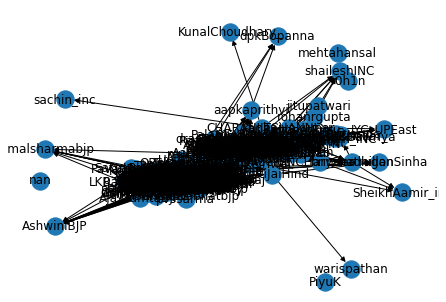

In [19]:
create_graph(id_name_mapping)

In [22]:
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

In [31]:
# This function is used to load graph and perform necessary network analysis
def load_graph():
    with open("copypasta_analysis.pkl", 'rb') as input_file:
        G = pickle.load(input_file)
    
    # H = G.copy()
    # for node in H.nodes():
    #     if isnan(node):
    #         print("nan node is present")
    nx.remove_nan_attributes(G, remove_nan=True, remove_none=True, copy=False)
    nx.draw(G,with_labels=True)
    # save figure
    plt.savefig('temp_graph.png')
    # creating pyvis network
    net = Network(directed=True)
    # Load from network graph
    net.from_nx(G)
    # show
    net.show('example.html')

In [32]:
load_graph()

AttributeError: module networkx has no attribute remove_nan_attributes